# Analysis of the sonic effects of music  
##### Author: Otuokere Tobechukwu. O 
##### Github: github.com/OtuokereTobechukwu

### Introduction

Music has been a wonder since time began. 
Don't try imagining Life without it. 

Frequently, very interesting questions pop up in my mind as regards how we humans percieve the sonic contents of music and how it affects us.

This is an atttempt, through Exploratory Data Analysis, to explain how different elements of music correlate with each other



## Importing essential libraries and dataset

In [29]:
# Importing needed libraries
import time
import warnings
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


Importing the dataset


In [30]:
dataset = pd.read_csv('data.csv')

# Overview of the dataset.
dataset.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [31]:
# Descriptive statistics of the dataset
dataset.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,168592.000000,1.685920e+05,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,84295.500000,0.501360,0.533648,2.327016e+05,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,48668.462629,0.377993,0.175919,1.223921e+05,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,42147.750000,0.097800,0.412000,1.721600e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,84295.500000,0.515000,0.543000,2.091330e+05,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,126443.250000,0.896000,0.662000,2.637070e+05,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,168591.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


In [32]:
dataset = dataset.drop(columns = dataset.columns[0])
cat_cols = ['artists', 'name', 'id']

In [33]:
numeric_cols = dataset.drop(columns=cat_cols)
numeric_cols.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,8,1921,0.4150,60.936,0.9630,1921
1,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,5,1921,0.0366,80.954,0.0594,1921
2,0.996,0.518,159507,0.203,0,0.000000,0,0.115,-10.589,1,6,1921,0.0615,66.221,0.4060,1921
3,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954,0.0594,1921
4,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,4,1921,0.0380,101.665,0.2530,1921


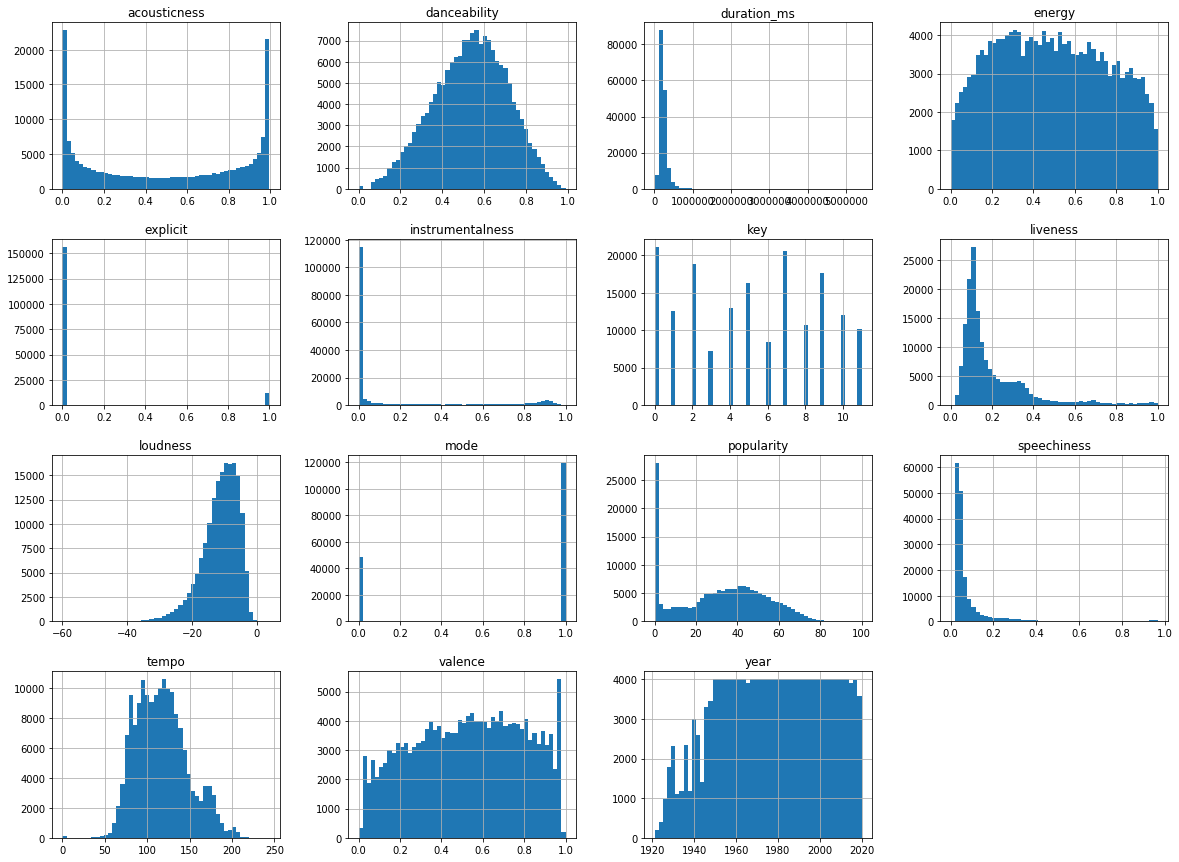

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
numeric_cols.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
# Converting milliseconds to minutes
minutes = (milli/(1000*60))%60




AttributeError: module 'time' has no attribute 'docs'